<a href="https://colab.research.google.com/github/clyde2020/Springboard/blob/main/Unit_27_Ultimate_Tech.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [93]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import json
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, auc
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping

In [79]:
my_json = open('/content/logins.json', 'r')
json_data = my_json.read()

obj = json.loads(json_data)

In [80]:
data = {'time': obj['login_time']}
df = pd.DataFrame(data)

In [81]:
df['count'] = 1

df['time'] = pd.to_datetime(df['time'])
df = df.set_index('time')

In [82]:
res_df = df['count'].resample('15min').sum()

In [83]:
res_df.head()

time
1970-01-01 20:00:00    2
1970-01-01 20:15:00    6
1970-01-01 20:30:00    9
1970-01-01 20:45:00    7
1970-01-01 21:00:00    1
Freq: 15T, Name: count, dtype: int64

In [84]:
decompfreq = 4 * 12
decomposition = sm.tsa.seasonal_decompose(res_df, freq=decompfreq, model='additive')

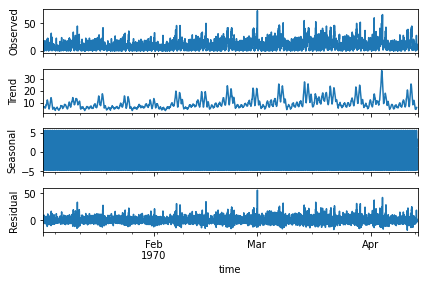

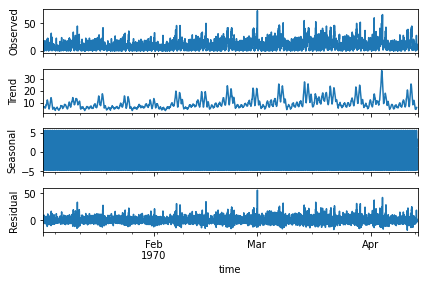

In [85]:
decomposition.plot()

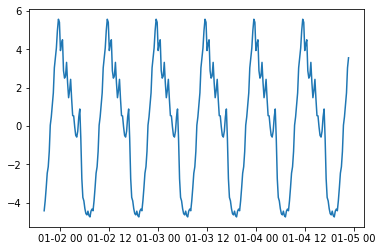

In [86]:
plt.plot(decomposition.seasonal[:300])

Ultimate Data Challenge

In [2]:
my_json = open('/content/ultimate_data_challenge.json', 'r')
json_data = my_json.read()

obj = json.loads(json_data)
ult_df = pd.DataFrame(obj)

In [3]:
ult_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   signup_date             50000 non-null  object 
 3   avg_rating_of_driver    41878 non-null  float64
 4   avg_surge               50000 non-null  float64
 5   last_trip_date          50000 non-null  object 
 6   phone                   49604 non-null  object 
 7   surge_pct               50000 non-null  float64
 8   ultimate_black_user     50000 non-null  bool   
 9   weekday_pct             50000 non-null  float64
 10  avg_dist                50000 non-null  float64
 11  avg_rating_by_driver    49799 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [4]:
ult_df.describe().T

,count,mean,std,min,25%,50%,75%,max
trips_in_first_30_days,50000.0,2.278200,3.792684,0.0,0.00,1.00,3.00,125.00
avg_rating_of_driver,41878.0,4.601559,0.617338,1.0,4.30,4.90,5.00,5.00
avg_surge,50000.0,1.074764,0.222336,1.0,1.00,1.00,1.05,8.00
surge_pct,50000.0,8.849536,19.958811,0.0,0.00,0.00,8.60,100.00
weekday_pct,50000.0,60.926084,37.081503,0.0,33.30,66.70,100.00,100.00
avg_dist,50000.0,5.796827,5.707357,0.0,2.42,3.88,6.94,160.96
avg_rating_by_driver,49799.0,4.778158,0.446652,1.0,4.70,5.00,5.00,5.00


In [5]:
ult_df.avg_rating_of_driver = ult_df.avg_rating_of_driver.fillna(ult_df.avg_rating_of_driver.mean())
ult_df.avg_rating_by_driver = ult_df.avg_rating_by_driver.fillna(ult_df.avg_rating_by_driver.mean())

In [6]:
ult_df.last_trip_date.min(), ult_df.last_trip_date.max()

('2014-01-01', '2014-07-01')

In [7]:
ult_df['last_trip_date'] = pd.to_datetime(ult_df['last_trip_date'])
d = datetime.timedelta(days = 30)

In [8]:
ult_df['Retained'] = ult_df.last_trip_date > (ult_df.last_trip_date.max() - d)
ult_df['Retained'] = ult_df['Retained'] * 1

In [9]:
phone_map = {'iPhone': 0, 'Android':1}
ult_df.phone = ult_df.phone.map(phone_map)
ult_df = ult_df.rename(columns={'phone': 'Android'})

ult_df.ultimate_black_user = ult_df.ultimate_black_user * 1

In [10]:
ult_df.Android.value_counts()

0.0    34582
1.0    15022
Name: Android, dtype: int64

In [11]:
ult_df.Android = ult_df.Android.fillna(0)
ult_df.drop(['signup_date', 'last_trip_date'], axis=1, inplace=True)
ult_df = pd.get_dummies(ult_df)

In [12]:
ult_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   trips_in_first_30_days  50000 non-null  int64  
 1   avg_rating_of_driver    50000 non-null  float64
 2   avg_surge               50000 non-null  float64
 3   Android                 50000 non-null  float64
 4   surge_pct               50000 non-null  float64
 5   ultimate_black_user     50000 non-null  int64  
 6   weekday_pct             50000 non-null  float64
 7   avg_dist                50000 non-null  float64
 8   avg_rating_by_driver    50000 non-null  float64
 9   Retained                50000 non-null  int64  
 10  city_Astapor            50000 non-null  uint8  
 11  city_King's Landing     50000 non-null  uint8  
 12  city_Winterfell         50000 non-null  uint8  
dtypes: float64(7), int64(3), uint8(3)
memory usage: 4.0 MB


In [13]:
X = ult_df.drop('Retained', axis=1)
y = ult_df.Retained

test_size = int(0.1 * len(X))

In [14]:
X_train_full, X_valid, y_train_full, y_valid = train_test_split(X, y, test_size=test_size, random_state=42, stratify=y)

In [15]:
len(X_train_full), len(y_train_full)

(45000, 45000)

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X_train_full, y_train_full, test_size=test_size, random_state=42)

In [17]:
len(X_train), len(X_valid), len(X_test)

(40000, 5000, 5000)

In [94]:
ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train_full)
X_valid_scaled = ss.transform(X_valid)

In [95]:
model_pipeline = []
model_pipeline.append(LogisticRegression(solver='liblinear'))
model_pipeline.append(SVC())
model_pipeline.append(KNeighborsClassifier())
model_pipeline.append(DecisionTreeClassifier())
model_pipeline.append(RandomForestClassifier())
model_pipeline.append(GaussianNB())


In [96]:
model_list = ['Logistic Regression', 'SVC', 'KNC', 'Decision Tree', 'Random Forest', 'Naive Bayes']
acc_list = []
auc_list = []
cm_list = []

In [97]:
for model in model_pipeline:
  model.fit(X_train_scaled, y_train_full)
  y_preds = model.predict(X_valid_scaled)
  acc_list.append(accuracy_score(y_valid, y_preds))
  cm_list.append(confusion_matrix(y_valid, y_preds))
  fpr, tpr, _thresholds = roc_curve(y_valid, y_preds)
  auc_list.append(round(auc(fpr, tpr), 2))


In [27]:
results = pd.DataFrame({'model': model_list, 'accuracy': acc_list, 'auc': auc_list})

In [29]:
results

,model,accuracy,auc
0,Logistic Regression,0.7280,0.68
1,SVC,0.7358,0.69
2,KNC,0.7452,0.72
3,Decision Tree,0.7088,0.68
4,Random Forest,0.7590,0.73
5,Naive Bayes,0.7314,0.72


In [98]:
results_scaled = pd.DataFrame({'model': model_list, 'accuracy': acc_list, 'auc': auc_list})
results_scaled

,model,accuracy,auc
0,Logistic Regression,0.7280,0.68
1,SVC,0.7688,0.73
2,KNC,0.7468,0.72
3,Decision Tree,0.7134,0.69
4,Random Forest,0.7584,0.73
5,Naive Bayes,0.7314,0.72


Investigate the Random Forest model a little bit more

In [89]:
n_estimators = [int(n) for n in np.logspace(start=1, stop=4, num=12)]
max_depth = [25, 50, 75]
param_grid = {'n_estimators': n_estimators,
              'max_depth': max_depth}

rf_reg = RandomForestClassifier(random_state=42, n_jobs=-1)
gm_cv = GridSearchCV(rf_reg, param_grid, cv=5, scoring='r2')
gm_cv.fit(X_train_full, y_train_full)
y_preds = gm_cv.predict(X_valid)

print(gm_cv.best_estimator_)
# print(r2_score(y_test, y_preds))
# print(mean_absolute_error(y_test, y_preds))
# print(mean_squared_error(y_test, y_preds))
print(gm_cv.best_params_)

RandomForestClassifier(max_depth=25, n_estimators=5336, n_jobs=-1,
                       random_state=42)
{'max_depth': 25, 'n_estimators': 5336}


In [90]:
acc_rf = accuracy_score(y_valid, y_preds)
cm_rf = confusion_matrix(y_valid, y_preds)
fpr, tpr, _thresholds = roc_curve(y_valid, y_preds)
auc_rf = round(auc(fpr, tpr), 2)

In [91]:
acc_rf, auc_rf

(0.761, 0.74)

12


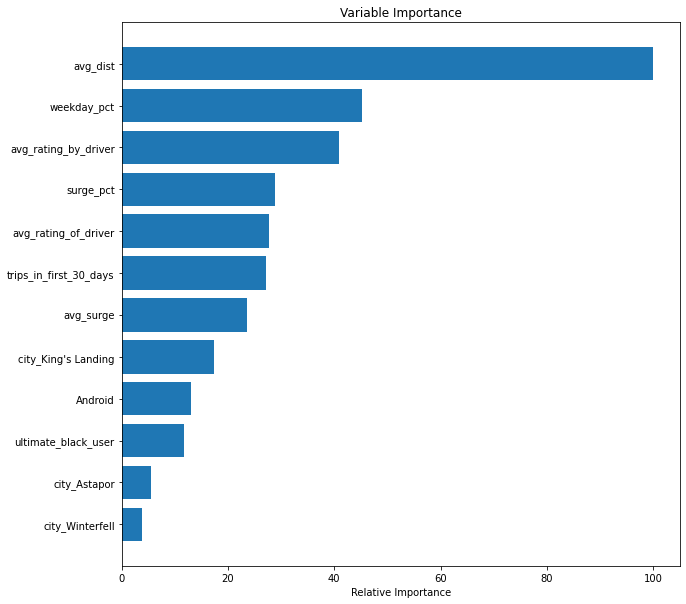

In [99]:
clf = RandomForestClassifier(n_estimators=5336, max_depth=25, random_state = 42,n_jobs=-1)
model_res = clf.fit(X_train_scaled, y_train_full)

feature_importance = clf.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())[:30]
sorted_idx = np.argsort(feature_importance)[:30]

pos = np.arange(sorted_idx.shape[0]) + .5
print(pos.size)
sorted_idx.size
plt.figure(figsize=(10,10))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

In [39]:
n_cols = len(X_train.columns)

In [68]:
model = Sequential()
model.add(Dense(48, activation='relu', input_shape=(n_cols, )))
model.add(Dense(96, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics='accuracy')

cb = EarlyStopping(patience=4)

history = model.fit(X_train, y_train,
                    epochs=100,
                    validation_data = (X_valid, y_valid),
                    callbacks=cb,
                    )

Epoch 1/100
1250/1250 [==============================] - 3s 2ms/step - loss: 0.5554 - accuracy: 0.7337 - val_loss: 0.5227 - val_accuracy: 0.7554
Epoch 2/100
1250/1250 [==============================] - 2s 2ms/step - loss: 0.5105 - accuracy: 0.7530 - val_loss: 0.5399 - val_accuracy: 0.7454
Epoch 3/100
1250/1250 [==============================] - 2s 2ms/step - loss: 0.5019 - accuracy: 0.7596 - val_loss: 0.5240 - val_accuracy: 0.7368
Epoch 4/100
1250/1250 [==============================] - 2s 2ms/step - loss: 0.4975 - accuracy: 0.7613 - val_loss: 0.5054 - val_accuracy: 0.7602
Epoch 5/100
1250/1250 [==============================] - 2s 2ms/step - loss: 0.4928 - accuracy: 0.7642 - val_loss: 0.5157 - val_accuracy: 0.7482
Epoch 6/100
1250/1250 [==============================] - 3s 2ms/step - loss: 0.4898 - accuracy: 0.7670 - val_loss: 0.5032 - val_accuracy: 0.7564
Epoch 7/100
1250/1250 [==============================] - 3s 2ms/step - loss: 0.4855 - accuracy: 0.7692 - val_loss: 0.4966 - val_ac

In [69]:
preds = model.predict(X_test)

preds = preds[:,0]
preds = np.round(preds)
preds.astype(int)

acc_nn = accuracy_score(y_test, preds)
cm_nn = confusion_matrix(y_test, preds)
fpr, tpr, _thresholds = roc_curve(y_test, preds)
auc_nn = round(auc(fpr, tpr), 2)

In [70]:
acc_nn, auc_nn

(0.7758, 0.75)